### Análisis exploratorio de datos y visualización de activos de renta variable

In [1]:
# Lo primero que hacemos es cargar las librerías deseadas
import yfinance as yf
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# visualizamos todas las columnas de los métodos en análisis 
pd.set_option('display.max_columns', None)

##### Algunas páginas que nos van a ayudar a escribir la notebook de esta clase:

* https://www.kaggle.com/code/lusfernandotorres/data-science-for-financial-markets
* https://www.kaggle.com/code/mmmarchetti/tutorial-python-for-finance

##### Algunas páginas que nos pueden ayudar con la documentación de la API:

* https://www.qmr.ai/yfinance-library-the-definitive-guide/ 
* https://aroussi.com/post/python-yahoo-finance
* https://algotrading101.com/learn/yfinance-guide/
* https://github.com/ranaroussi/yfinance

##### Algunas consideraciones respecto a la notebook:

* Vamos a detactar algunas anomalías en el modelado de datos que dejaremos para analizar en las próximas notebooks
* La intención de esta notebook es que sirva como introducción a los elementos para analizar financiera y estadisticamente
      un activo y brindar una introducción a la gestión del riesgo

In [3]:
# Lo primero que hacemos es descargar la información de la acción del banco patagonia 
Merval = yf.download('^MERV', auto_adjust=True)
Merval

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Open          High           Low         Close  Volume
Date                                                                      
1996-10-08  5.794000e+02  5.927000e+02  5.794000e+02  5.901000e+02       0
1996-10-09  5.901000e+02  5.908000e+02  5.822000e+02  5.831000e+02       0
1996-10-10  5.832000e+02  5.846000e+02  5.783000e+02  5.846000e+02       0
1996-10-11  5.849000e+02  5.859000e+02  5.824000e+02  5.843000e+02       0
1996-10-14  5.843000e+02  5.843000e+02  5.806000e+02  5.840000e+02       0
...                  ...           ...           ...           ...     ...
2024-01-30  1.253608e+06  1.278752e+06  1.253608e+06  1.267134e+06       0
2024-01-31  1.267134e+06  1.279852e+06  1.230005e+06  1.260563e+06       0
2024-02-01  1.260563e+06  1.303418e+06  1.251032e+06  1.302467e+06       0
2024-02-02  1.302467e+06  1.326322e+06  1.295987e+06  1.316204e+06       0
2024-02-05  1.316204e+06  1.334440e+06  1.238999e+06  1.260998e+06       0

[6688 rows x 5 columns]

##### Comandos básicos de un primer análisis exploratorio de datos

In [4]:
# Primero vemos las dimensiones a la data:
Merval.shape

(6688, 5)

In [5]:
# Obtenemos los datos de nombres de las columnas del dataframe. De acá vemos que el campo Date no pareciera ser una columna
Merval.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
# Vemos los indices que existen en el dataframe
Merval.index

DatetimeIndex(['1996-10-08', '1996-10-09', '1996-10-10', '1996-10-11',
               '1996-10-14', '1996-10-15', '1996-10-16', '1996-10-17',
               '1996-10-18', '1996-10-21',
               ...
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-05'],
              dtype='datetime64[ns]', name='Date', length=6688, freq=None)

In [7]:
# Utilizamos el método "info" para obtener información general sobre el data frame. En este caso podemos ver la cantidad de campos
# no nulos, y el el tipo de datos como el consumo de la memoria
Merval.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6688 entries, 1996-10-08 to 2024-02-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6688 non-null   float64
 1   High    6688 non-null   float64
 2   Low     6688 non-null   float64
 3   Close   6688 non-null   float64
 4   Volume  6688 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 313.5 KB


In [8]:
# Tenemos otra forma de ver también los tipos de las variables
Merval.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [9]:
# Otra opción muy útil que podemos utilizar para análizar de forma rápida los datos es utilizar el método describe.
# Proporciona una descripción estadística de los datos.
Merval.describe()

Open          High           Low         Close        Volume
count  6.688000e+03  6.688000e+03  6.688000e+03  6.688000e+03   6688.000000
mean   3.439556e+04  3.519055e+04  3.385023e+04  3.457430e+04      2.601675
std    1.180743e+05  1.215558e+05  1.158720e+05  1.190037e+05    212.765455
min    1.996000e+02  2.031000e+02  1.934000e+02  2.009000e+02      0.000000
25%    8.306750e+02  8.353750e+02  8.225750e+02  8.311500e+02      0.000000
50%    2.297700e+03  2.317500e+03  2.278500e+03  2.295750e+03      0.000000
75%    1.971440e+04  1.982905e+04  1.951967e+04  1.968725e+04      0.000000
max    1.316204e+06  1.334440e+06  1.295987e+06  1.316204e+06  17400.000000

In [10]:
# Una técnica útil que podemos encontrar para chequear si tenemos nulos (independiente del método "info") es:
Merval['Close'].isnull().sum()

0

##### Analizamos como se descargar la información en función de los nulos

In [11]:
# Para hacer esto usamos la acción del galicia por la capitalización de mercado que tiene en argentina
LaGallega = yf.download(["GGAL","GGAL.BA"],auto_adjust=True)["Close"]
LaGallega

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


Ticker           GGAL      GGAL.BA
Date                              
2000-07-25  14.040114          NaN
2000-07-26  14.040114     1.426696
2000-07-27  14.040114     1.443189
2000-07-28  13.939828     1.418449
2000-07-31  14.190548     1.443189
...               ...          ...
2024-01-31  21.610001  2751.600098
2024-02-01  21.830000  2806.250000
2024-02-02  21.900000  2830.899902
2024-02-05  20.770000  2692.699951
2024-02-06  20.524000  2554.449951

[6087 rows x 2 columns]

In [12]:
# Lo primero qu ehacemos es la cantidad de nulos que tiene cada columna
print(LaGallega['GGAL'].isnull().sum())
print(LaGallega['GGAL.BA'].isnull().sum())

166
225


In [13]:
# Ahora que sabemos donde tienen nulos chequeamos en que fechas tiene nulos.
# Nota: De esta forma podemos aplizar un filtro a un DataFrame
LaGallega[LaGallega['GGAL'].isnull()]

Ticker      GGAL      GGAL.BA
Date                         
2000-09-04   NaN     1.451436
2000-11-23   NaN     1.146305
2000-12-25   NaN     1.245266
2001-01-01   NaN     1.228773
2001-01-15   NaN     1.525658
...          ...          ...
2023-05-29   NaN   546.808655
2023-07-04   NaN   903.958740
2023-09-04   NaN  1345.008911
2023-11-23   NaN  1365.199951
2024-01-15   NaN  1846.800049

[166 rows x 2 columns]

In [14]:
# Ahora que sabemos donde tienen nulos chequeamos en que fechas tiene nulos
LaGallega[LaGallega['GGAL.BA'].isnull()]

Ticker           GGAL  GGAL.BA
Date                          
2000-07-25  14.040114      NaN
2006-05-01   6.047893      NaN
2006-05-25   5.101625      NaN
2006-06-20   4.772488      NaN
2006-08-21   5.076940      NaN
...               ...      ...
2023-10-13  11.930000      NaN
2023-10-16  12.600000      NaN
2023-11-06  12.040000      NaN
2023-11-20  14.650000      NaN
2023-12-08  17.500000      NaN

[225 rows x 2 columns]

In [15]:
# Hay algo raro que aparece que es que cuando descargamos la información sobre un único ticker no tenemos nulos. Pero cuando
# descargamos varios tickers si observamos nulos en ambas componentes. Lo primero que vamos a hacer es descargar la información toda junta para
# chequear los nulos.
Data = yf.download(["GGAL","GGAL.BA", "^MERV"],auto_adjust=True)["Close"]
Data

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*******************

Ticker           GGAL      GGAL.BA         ^MERV
Date                                            
1996-10-08        NaN          NaN  5.901000e+02
1996-10-09        NaN          NaN  5.831000e+02
1996-10-10        NaN          NaN  5.846000e+02
1996-10-11        NaN          NaN  5.843000e+02
1996-10-14        NaN          NaN  5.840000e+02
...               ...          ...           ...
2024-01-31  21.610001  2751.600098  1.260563e+06
2024-02-01  21.830000  2806.250000  1.302467e+06
2024-02-02  21.900000  2830.899902  1.316204e+06
2024-02-05  20.770000  2692.699951  1.260998e+06
2024-02-06  20.524000  2555.000000           NaN

[7032 rows x 3 columns]

In [16]:
# Chequamos ahora las dimensiones
Data.shape

(7032, 3)

In [17]:
# Chequamos ahora los nulos
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7032 entries, 1996-10-08 to 2024-02-06
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GGAL     5921 non-null   float64
 1   GGAL.BA  5862 non-null   float64
 2   ^MERV    6688 non-null   float64
dtypes: float64(3)
memory usage: 219.8 KB


##### Vemos dos formas de calcular el Merval ajustado por inflación y graficarlo:

* *Primero vas a ver como calcularlo aplicando un join y haciendo un match por una variable de los dataframes*
* *Segundo vamos a realizar el cálculo directamente eliminando los nulos que se crean por importar distintos activos*

###### Primera Opción

In [18]:
# Lo primero es que vamos a ver si estas fechas representan en general feriados. Para eso creamos un 
# dataframe con las fechas de valores nulos en la gallega del merval
Fechas = pd.DataFrame({'Fechas': pd.to_datetime(LaGallega[LaGallega['GGAL.BA'].isnull()].index)})
Fechas

Fechas
0   2000-07-25
1   2006-05-01
2   2006-05-25
3   2006-06-20
4   2006-08-21
..         ...
220 2023-10-13
221 2023-10-16
222 2023-11-06
223 2023-11-20
224 2023-12-08

[225 rows x 1 columns]

In [19]:
# Creamos los campos de mes y día
Fechas['Mes'] = Fechas['Fechas'].dt.month
Fechas['Dia'] = Fechas['Fechas'].dt.day
Fechas

Fechas  Mes  Dia
0   2000-07-25    7   25
1   2006-05-01    5    1
2   2006-05-25    5   25
3   2006-06-20    6   20
4   2006-08-21    8   21
..         ...  ...  ...
220 2023-10-13   10   13
221 2023-10-16   10   16
222 2023-11-06   11    6
223 2023-11-20   11   20
224 2023-12-08   12    8

[225 rows x 3 columns]

In [20]:
# Una vez que tenemos esto vamos a contar la cantidad de veces que aparecen estos datos distintos para ver si siempre son las mismas fechas
# De esta forma podemos ir chequeando si son feriados o no.
Agrupa = Fechas.groupby(['Mes', 'Dia']).size().reset_index()
Agrupa[Agrupa['Mes'] == 8]

Mes  Dia  0
51    8   15  3
52    8   16  2
53    8   17  4
54    8   18  1
55    8   19  2
56    8   20  4
57    8   21  3

In [21]:
# Una vez corroborados que los nulos son mayormente feriados. Eliminamos los nulos
LaGallega.dropna(inplace=True)

In [22]:
LaGallega['CCL']=LaGallega['GGAL.BA']*10/LaGallega['GGAL']
LaGallega

Ticker           GGAL      GGAL.BA          CCL
Date                                           
2000-07-26  14.040114     1.426696     1.016157
2000-07-27  14.040114     1.443189     1.027904
2000-07-28  13.939828     1.418449     1.017551
2000-07-31  14.190548     1.443189     1.017007
2000-08-01  14.040114     1.451436     1.033778
...               ...          ...          ...
2024-01-31  21.610001  2751.600098  1273.299408
2024-02-01  21.830000  2806.250000  1285.501608
2024-02-02  21.900000  2830.899902  1292.648380
2024-02-05  20.770000  2692.699951  1296.437117
2024-02-06  20.524000  2554.449951  1244.616025

[5696 rows x 3 columns]

In [23]:
# Ahora lo que hacemos es un inner join entra ambos dataframes. Tiene sentido que haya algunos registros menos que
# el dataframe de menor shape porque pueden no coincidir algunas fechas
dataFinal = pd.merge(LaGallega, Merval, left_index=True, right_index=True, how='inner')
dataFinal

GGAL      GGAL.BA          CCL          Open          High  \
Date                                                                          
2000-07-26  14.040114     1.426696     1.016157  5.174000e+02  5.200000e+02   
2000-07-27  14.040114     1.443189     1.027904  5.151000e+02  5.154000e+02   
2000-07-28  13.939828     1.418449     1.017551  5.096000e+02  5.096000e+02   
2000-07-31  14.190548     1.443189     1.017007  4.974000e+02  5.025000e+02   
2000-08-01  14.040114     1.451436     1.033778  5.020000e+02  5.020000e+02   
...               ...          ...          ...           ...           ...   
2024-01-30  21.500000  2744.100098  1276.325627  1.253608e+06  1.278752e+06   
2024-01-31  21.610001  2751.600098  1273.299408  1.267134e+06  1.279852e+06   
2024-02-01  21.830000  2806.250000  1285.501608  1.260563e+06  1.303418e+06   
2024-02-02  21.900000  2830.899902  1292.648380  1.302467e+06  1.326322e+06   
2024-02-05  20.770000  2692.699951  1296.437117  1.316204e+06  1.334440e+06   

                     Low         Close  Volume  
Date                                            
2000-07-26  5.119000e+02  5.146000e+02       0  
2000-07-27  5.073000e+02  5.086000e+02       0  
2000-07-28  4.957000e+02  4.970000e+02       0  
2000-07-31  4.934000e+02  5.020000e+02       0  
2000-08-01  4.881000e+02  4.888000e+02       0  
...                  ...           ...     ...  
2024-01-30  1.253608e+06  1.267134e+06       0  
2024-01-31  1.230005e+06  1.260563e+06       0  
2024-02-01  1.251032e+06  1.302467e+06       0  
2024-02-02  1.295987e+06  1.316204e+06       0  
2024-02-05  1.238999e+06  1.260998e+06       0  

[5594 rows x 8 columns]

In [24]:
# Ahora lo que hacemos es armar la división columna por columna
dataFinal['Merval_en_CCL'] = dataFinal['Close'] / dataFinal['CCL']
dataFinal['Open_en_CCL'] = dataFinal['Open'] / dataFinal['CCL']
dataFinal['High_en_CCL'] = dataFinal['High'] / dataFinal['CCL']
dataFinal['Low_en_CCL'] = dataFinal['Low'] / dataFinal['CCL']
dataFinal

GGAL      GGAL.BA          CCL          Open          High  \
Date                                                                          
2000-07-26  14.040114     1.426696     1.016157  5.174000e+02  5.200000e+02   
2000-07-27  14.040114     1.443189     1.027904  5.151000e+02  5.154000e+02   
2000-07-28  13.939828     1.418449     1.017551  5.096000e+02  5.096000e+02   
2000-07-31  14.190548     1.443189     1.017007  4.974000e+02  5.025000e+02   
2000-08-01  14.040114     1.451436     1.033778  5.020000e+02  5.020000e+02   
...               ...          ...          ...           ...           ...   
2024-01-30  21.500000  2744.100098  1276.325627  1.253608e+06  1.278752e+06   
2024-01-31  21.610001  2751.600098  1273.299408  1.267134e+06  1.279852e+06   
2024-02-01  21.830000  2806.250000  1285.501608  1.260563e+06  1.303418e+06   
2024-02-02  21.900000  2830.899902  1292.648380  1.302467e+06  1.326322e+06   
2024-02-05  20.770000  2692.699951  1296.437117  1.316204e+06  1.334440e+06   

                     Low         Close  Volume  Merval_en_CCL  Open_en_CCL  \
Date                                                                         
2000-07-26  5.119000e+02  5.146000e+02       0     506.417950   509.173478   
2000-07-27  5.073000e+02  5.086000e+02       0     494.793195   501.116712   
2000-07-28  4.957000e+02  4.970000e+02       0     488.427531   500.810206   
2000-07-31  4.934000e+02  5.020000e+02       0     493.605049   489.081969   
2000-08-01  4.881000e+02  4.888000e+02       0     472.828847   485.597560   
...                  ...           ...     ...            ...          ...   
2024-01-30  1.253608e+06  1.267134e+06       0     992.798369   982.200759   
2024-01-31  1.230005e+06  1.260563e+06       0     989.997319   995.157928   
2024-02-01  1.251032e+06  1.302467e+06       0    1013.197488   980.600096   
2024-02-02  1.295987e+06  1.316204e+06       0    1018.222759  1007.595739   
2024-02-05  1.238999e+06  1.260998e+06       0     972.664222  1015.247082   

            High_en_CCL   Low_en_CCL  
Date                                  
2000-07-26   511.732115   503.760897  
2000-07-27   501.408616   493.528468  
2000-07-28   500.810206   487.149966  
2000-07-31   494.096687   485.148861  
2000-08-01   485.597560   472.151737  
...                 ...          ...  
2024-01-30  1001.901061   982.200759  
2024-01-31  1005.146152   965.998250  
2024-02-01  1013.937277   973.185870  
2024-02-02  1026.050101  1002.582775  
2024-02-05  1029.313325   955.695408  

[5594 rows x 12 columns]

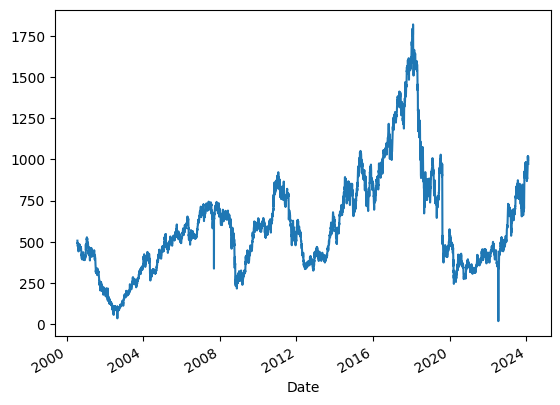

In [25]:
# Hacemos un gráfico simple del merval ajustado por inflación. Aparentemente tenemos algunos problemas con
# algunos outliers que nos generan problemas
dataFinal['Merval_en_CCL'].plot()
plt.show()

Text(0.5, 1.0, 'Merval en temporalidad diaria ajustado por CCL')

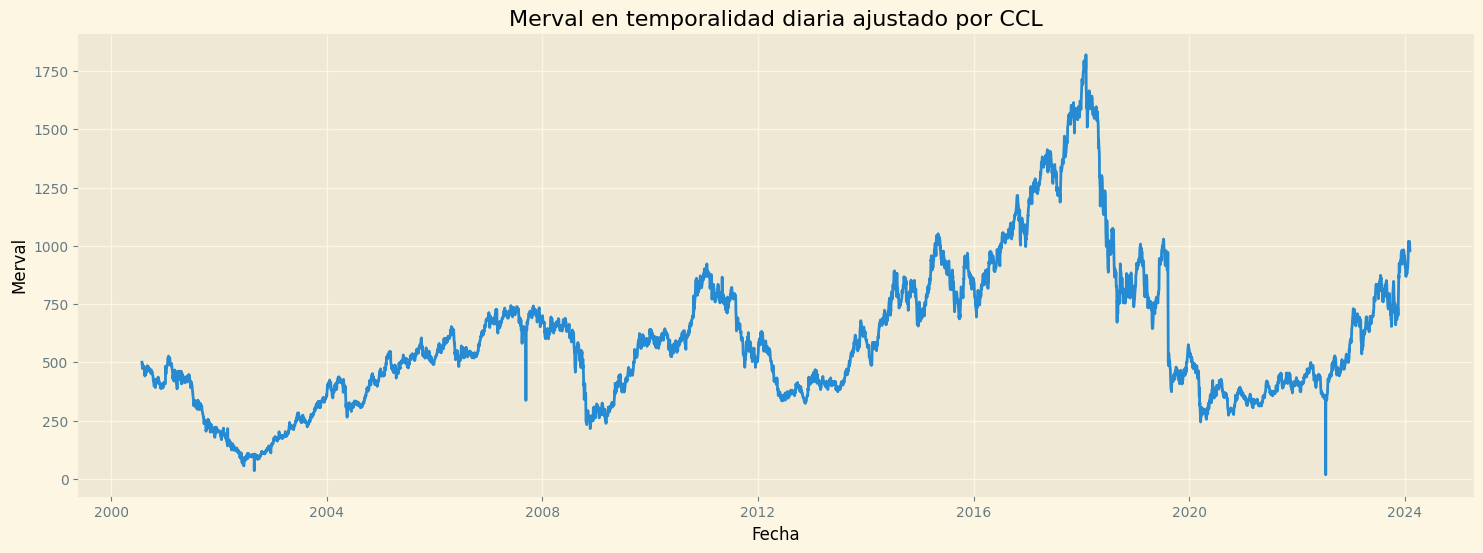

In [26]:
# Otra funcionalidad de matplotlib es que podemos seleccionar el estilo del gráfico
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('Solarize_Light2') 
plt.figure(figsize=(18,6)) 

plt.plot(dataFinal['Merval_en_CCL'])

plt.xlabel('Fecha',  color='black')  
plt.ylabel('Merval',  color='black') 
plt.title('Merval en temporalidad diaria ajustado por CCL', color='black')  

###### Segunda Opción

In [27]:
# Ahora hacemos todo dentro del data frame
Data = Data.dropna()
Data["CCL"] = Data["GGAL.BA"]*10/Data["GGAL"]
Data["Merval_en_CCL"] = Data["^MERV"] / Data["CCL"]
Data

/tmp/ipykernel_14811/2014898947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["CCL"] = Data["GGAL.BA"]*10/Data["GGAL"]
/tmp/ipykernel_14811/2014898947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Merval_en_CCL"] = Data["^MERV"] / Data["CCL"]


Ticker           GGAL      GGAL.BA         ^MERV          CCL  Merval_en_CCL
Date                                                                        
2000-07-26  14.040114     1.426696  5.146000e+02     1.016157     506.417950
2000-07-27  14.040114     1.443189  5.086000e+02     1.027904     494.793236
2000-07-28  13.939827     1.418449  4.970000e+02     1.017551     488.427497
2000-07-31  14.190545     1.443189  5.020000e+02     1.017008     493.604990
2000-08-01  14.040114     1.451436  4.888000e+02     1.033778     472.828847
...               ...          ...           ...          ...            ...
2024-01-30  21.500000  2744.100098  1.267134e+06  1276.325627     992.798369
2024-01-31  21.610001  2751.600098  1.260563e+06  1273.299408     989.997319
2024-02-01  21.830000  2806.250000  1.302467e+06  1285.501608    1013.197488
2024-02-02  21.900000  2830.899902  1.316204e+06  1292.648380    1018.222759
2024-02-05  20.770000  2692.699951  1.260998e+06  1296.437117     972.664222

[5594 rows x 5 columns]

Text(0.5, 1.0, 'Merval en temporalidad diaria ajustado por CCL')

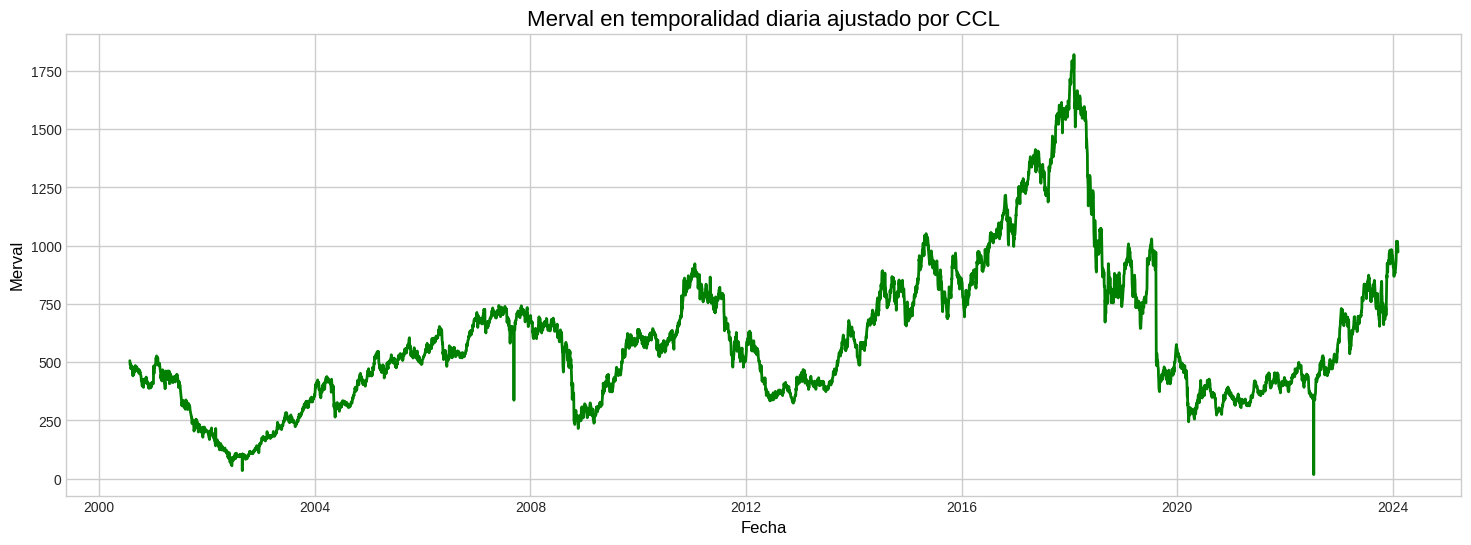

In [28]:
# Chequeamos que el gráfico sea el mismo. Ya la dimensión de las variables son las mismas
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(18,6)) 

plt.plot(Data['Merval_en_CCL'], color = 'green')

plt.xlabel('Fecha',  color='black')  
plt.ylabel('Merval',  color='black') 
plt.title('Merval en temporalidad diaria ajustado por CCL', color='black')  

##### Agregamos un gráfico de velas japonesas:

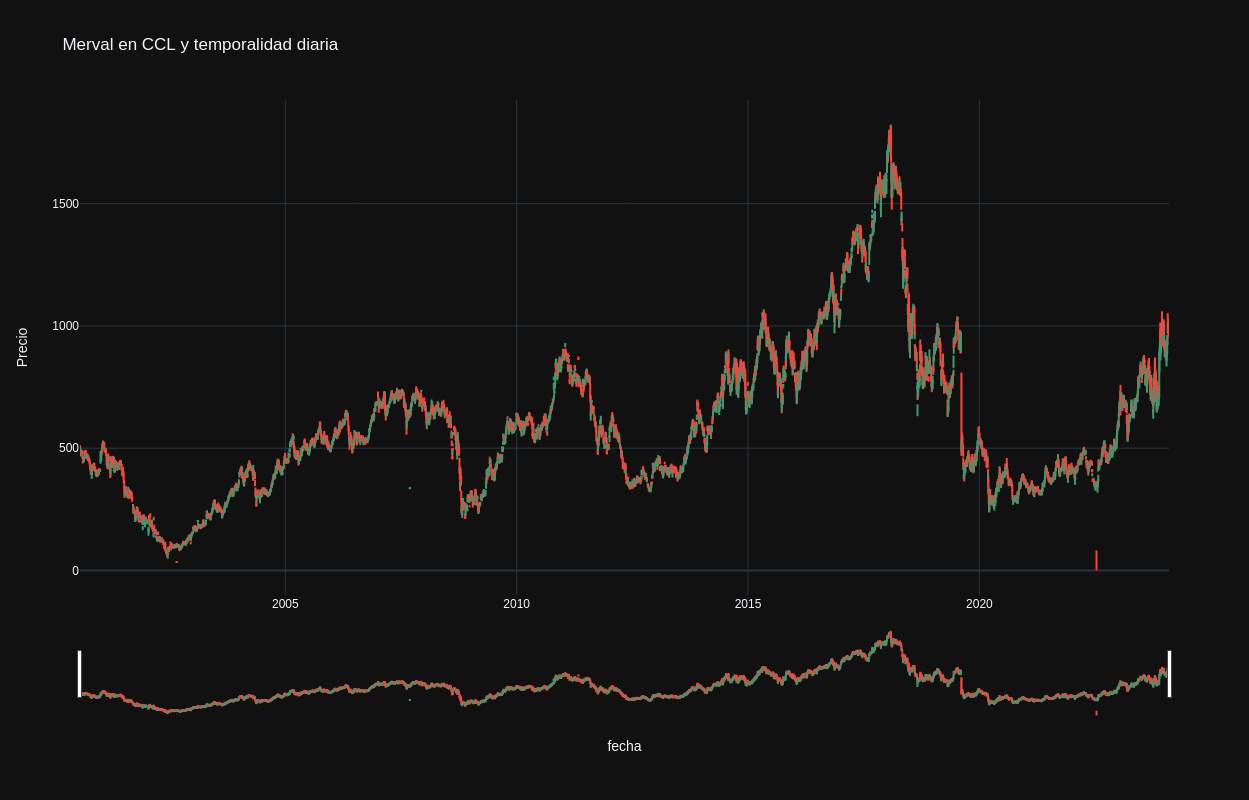

In [29]:
# Para crear un gráfico de velas japonesas podemos seguir la documentación de plotly
# https://plotly.com/python/candlestick-charts/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dataFinal.index, 
                                     open=dataFinal['Open_en_CCL'], high=dataFinal['High_en_CCL'], 
                                     low=dataFinal['Low_en_CCL'], close=dataFinal['Merval_en_CCL'])])
fig.update_layout(template = 'plotly_dark', xaxis_title='fecha', yaxis_title='Precio', title_text="Merval en CCL y temporalidad diaria",
                 height=800, width=1300)
fig.show()

##### Realizamos algunos cálculos de indicadores de la acción y análisis de la misma 

In [30]:
# Vamos a trabjar con la acción de YPF que ya se encuentra en dólares y las podemos analizar
accion_ypf=yf.download('YPF', interval='1d', auto_adjust=True)
accion_ypf

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close    Volume
Date                                                            
1993-06-29   5.529874   5.757575   5.497345   5.692517  34346800
1993-06-30   5.725044   5.985273   5.627458   5.659986   9060600
1993-07-01   5.562400   5.627457   5.464814   5.529871   4273100
1993-07-02   5.497344   5.529873   5.399758   5.497344   2504500
1993-07-06   5.432287   5.464815   5.367229   5.399758   2030400
...               ...        ...        ...        ...       ...
2024-01-30  17.500000  17.620001  17.230000  17.290001   1300200
2024-01-31  17.290001  17.690001  17.110001  17.280001   1557200
2024-02-01  17.580000  17.730000  17.240000  17.490000   1658500
2024-02-02  17.280001  17.480000  17.059999  17.180000   1113200
2024-02-05  17.040001  17.139999  16.240000  16.410000   1533900

[7706 rows x 5 columns]

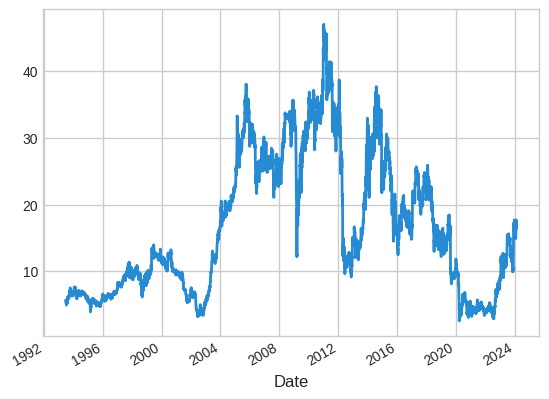

In [31]:
# Hacemos un gráfico simple de la acción de YPF
accion_ypf['Close'].plot()
plt.show()

In [32]:
# Primero que vamos a calcular es el promedio, el mínimo y el máximo de esta acción. Es importante, no confundir
# el concepto de esperanza con el promedio
print(accion_ypf['Close'].mean())
print(accion_ypf['Close'].min())
print(accion_ypf['Close'].max())

# Otra forma de obtener esto datos es a partir del método describe
accion_ypf['Close'].describe()

16.542319275204807
2.569999933242798
46.98906326293945


count    7706.000000
mean       16.542319
std        10.238236
min         2.570000
25%         7.157801
50%        13.677602
75%        25.101894
max        46.989063
Name: Close, dtype: float64

In [33]:
# Segundo vamos a calcular la simple moving average del activo (el promedio movil)
# Las medias moviles nos sirven para suavizar el movimiento de las acciones y mejorar la visualización de tendencias.
# Como es un simple promedio, todos los precios van a tener la misma ponderación
accion_ypf['MA_10'] = accion_ypf['Close'].rolling(window=10).mean()
accion_ypf['MA_21'] = accion_ypf['Close'].rolling(window=21).mean()
accion_ypf['MA_55'] = accion_ypf['Close'].rolling(window=55).mean()
accion_ypf

Open       High        Low      Close    Volume   MA_10  \
Date                                                                       
1993-06-29   5.529874   5.757575   5.497345   5.692517  34346800     NaN   
1993-06-30   5.725044   5.985273   5.627458   5.659986   9060600     NaN   
1993-07-01   5.562400   5.627457   5.464814   5.529871   4273100     NaN   
1993-07-02   5.497344   5.529873   5.399758   5.497344   2504500     NaN   
1993-07-06   5.432287   5.464815   5.367229   5.399758   2030400     NaN   
...               ...        ...        ...        ...       ...     ...   
2024-01-30  17.500000  17.620001  17.230000  17.290001   1300200  16.359   
2024-01-31  17.290001  17.690001  17.110001  17.280001   1557200  16.587   
2024-02-01  17.580000  17.730000  17.240000  17.490000   1658500  16.816   
2024-02-02  17.280001  17.480000  17.059999  17.180000   1113200  16.971   
2024-02-05  17.040001  17.139999  16.240000  16.410000   1533900  17.048   

                MA_21      MA_55  
Date                              
1993-06-29        NaN        NaN  
1993-06-30        NaN        NaN  
1993-07-01        NaN        NaN  
1993-07-02        NaN        NaN  
1993-07-06        NaN        NaN  
...               ...        ...  
2024-01-30  16.306667  15.800182  
2024-01-31  16.310953  15.933273  
2024-02-01  16.357143  16.063637  
2024-02-02  16.376667  16.191273  
2024-02-05  16.385238  16.299273  

[7706 rows x 8 columns]

In [34]:
# Tercero vamos a calcular la Exponential moving average del activo. 
# La media movil exponencial es similar a la media movil simple pero, en este caso, genera una 
# mejor ponderación para los datos más recientes. ¿Cómo hace las ponderaciones? Lo hace a través un ponderador
# que depende de la ventana de análisis y un factor de suavizado: factor_suavizado / (1+días).
# Generalmente este factor de suavizado se lo pone en 2.
# Posbilemente vean otra formula de cálculo que es recursiva. En el inicio, la EMA es igual al precio (en esa fórmula)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
accion_ypf['EMA_10'] = accion_ypf['Close'].ewm(span=10).mean()
accion_ypf['EMA_21'] = accion_ypf['Close'].ewm(span=21).mean()
accion_ypf['EMA_55'] = accion_ypf['Close'].ewm(span=55).mean()
accion_ypf

Open       High        Low      Close    Volume   MA_10  \
Date                                                                       
1993-06-29   5.529874   5.757575   5.497345   5.692517  34346800     NaN   
1993-06-30   5.725044   5.985273   5.627458   5.659986   9060600     NaN   
1993-07-01   5.562400   5.627457   5.464814   5.529871   4273100     NaN   
1993-07-02   5.497344   5.529873   5.399758   5.497344   2504500     NaN   
1993-07-06   5.432287   5.464815   5.367229   5.399758   2030400     NaN   
...               ...        ...        ...        ...       ...     ...   
2024-01-30  17.500000  17.620001  17.230000  17.290001   1300200  16.359   
2024-01-31  17.290001  17.690001  17.110001  17.280001   1557200  16.587   
2024-02-01  17.580000  17.730000  17.240000  17.490000   1658500  16.816   
2024-02-02  17.280001  17.480000  17.059999  17.180000   1113200  16.971   
2024-02-05  17.040001  17.139999  16.240000  16.410000   1533900  17.048   

                MA_21      MA_55     EMA_10     EMA_21     EMA_55  
Date                                                               
1993-06-29        NaN        NaN   5.692517   5.692517   5.692517  
1993-06-30        NaN        NaN   5.674625   5.675477   5.675956  
1993-07-01        NaN        NaN   5.616435   5.622250   5.625480  
1993-07-02        NaN        NaN   5.577200   5.586428   5.591678  
1993-07-06        NaN        NaN   5.526261   5.541661   5.550453  
...               ...        ...        ...        ...        ...  
2024-01-30  16.306667  15.800182  16.743811  16.489639  15.725160  
2024-01-31  16.310953  15.933273  16.841300  16.561490  15.780690  
2024-02-01  16.357143  16.063637  16.959245  16.645900  15.841737  
2024-02-02  16.376667  16.191273  16.999382  16.694455  15.889532  
2024-02-05  16.385238  16.299273  16.892222  16.668595  15.908120  

[7706 rows x 11 columns]

Text(0.5, 1.0, 'Precio de la acción YPF en temporalidad diaria')

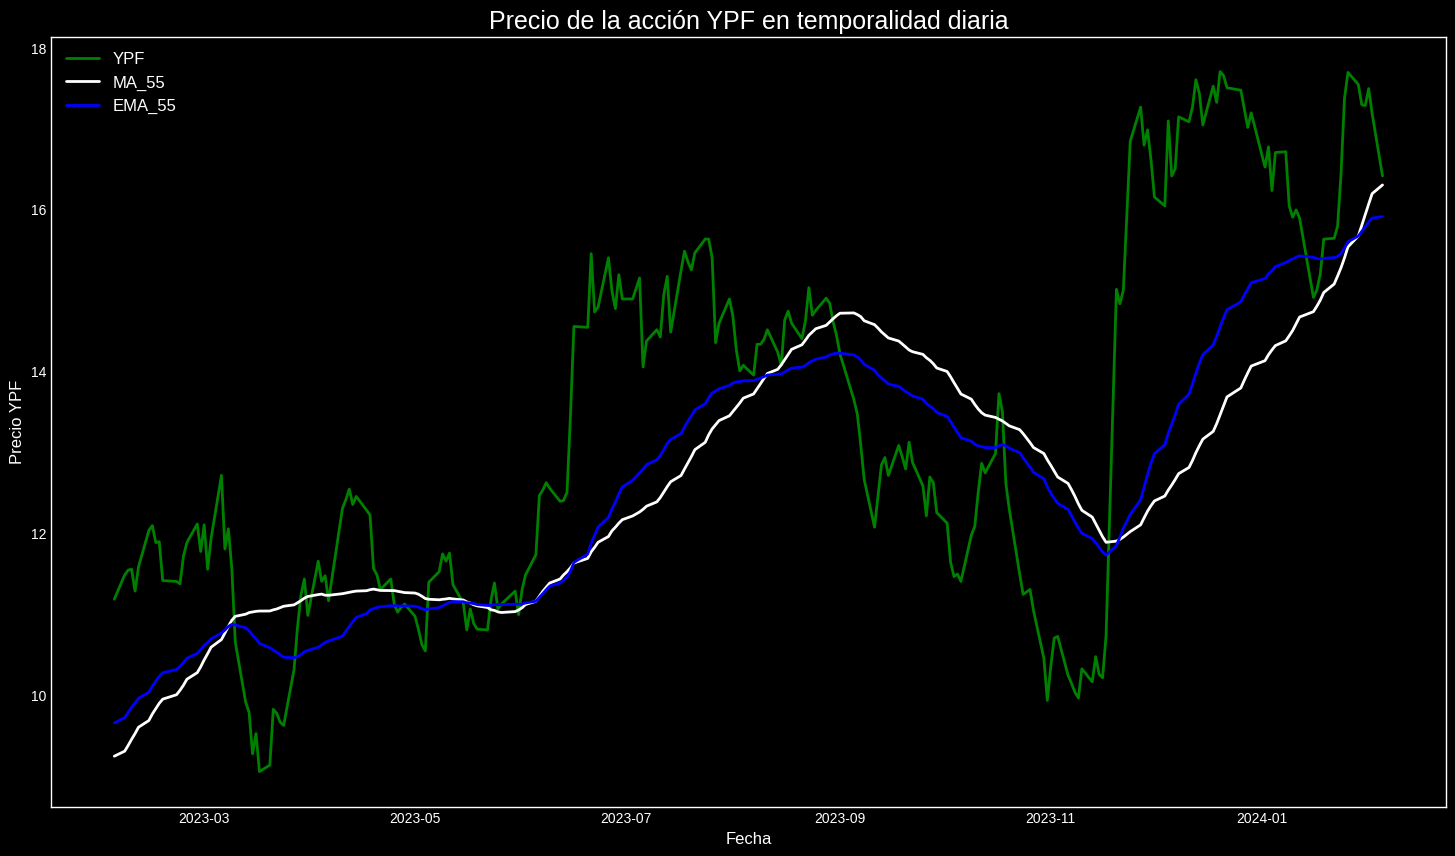

In [35]:
# Armamos un gráfico con estos elementos
plt.style.use('dark_background') 
plt.figure(figsize=(18,10)) 

plt.plot(accion_ypf['Close'][-252:], color = 'green', label = 'YPF')
plt.plot(accion_ypf['MA_55'][-252:], color = 'white', label = 'MA_55')
plt.plot(accion_ypf['EMA_55'][-252:], color = 'blue', label = 'EMA_55')

plt.xlabel('Fecha')  
plt.ylabel('Precio YPF')
plt.legend(fontsize=12)
plt.grid(False)
plt.title('Precio de la acción YPF en temporalidad diaria', fontsize = 18)  

In [36]:
# Cuarto vamos a calcular la dispersión respecto media movil en términos porcentales
accion_ypf['disp_21']=(accion_ypf['Close']-accion_ypf['MA_21'])/accion_ypf['Close']*100

# Calculamos también la disperción respecto a la media en términos absolutos
accion_ypf['disp_media']=(accion_ypf['Close']-accion_ypf['Close'].mean())
accion_ypf

Open       High        Low      Close    Volume   MA_10  \
Date                                                                       
1993-06-29   5.529874   5.757575   5.497345   5.692517  34346800     NaN   
1993-06-30   5.725044   5.985273   5.627458   5.659986   9060600     NaN   
1993-07-01   5.562400   5.627457   5.464814   5.529871   4273100     NaN   
1993-07-02   5.497344   5.529873   5.399758   5.497344   2504500     NaN   
1993-07-06   5.432287   5.464815   5.367229   5.399758   2030400     NaN   
...               ...        ...        ...        ...       ...     ...   
2024-01-30  17.500000  17.620001  17.230000  17.290001   1300200  16.359   
2024-01-31  17.290001  17.690001  17.110001  17.280001   1557200  16.587   
2024-02-01  17.580000  17.730000  17.240000  17.490000   1658500  16.816   
2024-02-02  17.280001  17.480000  17.059999  17.180000   1113200  16.971   
2024-02-05  17.040001  17.139999  16.240000  16.410000   1533900  17.048   

                MA_21      MA_55     EMA_10     EMA_21     EMA_55   disp_21  \
Date                                                                          
1993-06-29        NaN        NaN   5.692517   5.692517   5.692517       NaN   
1993-06-30        NaN        NaN   5.674625   5.675477   5.675956       NaN   
1993-07-01        NaN        NaN   5.616435   5.622250   5.625480       NaN   
1993-07-02        NaN        NaN   5.577200   5.586428   5.591678       NaN   
1993-07-06        NaN        NaN   5.526261   5.541661   5.550453       NaN   
...               ...        ...        ...        ...        ...       ...   
2024-01-30  16.306667  15.800182  16.743811  16.489639  15.725160  5.687299   
2024-01-31  16.310953  15.933273  16.841300  16.561490  15.780690  5.607917   
2024-02-01  16.357143  16.063637  16.959245  16.645900  15.841737  6.477168   
2024-02-02  16.376667  16.191273  16.999382  16.694455  15.889532  4.675980   
2024-02-05  16.385238  16.299273  16.892222  16.668595  15.908120  0.150893   

            disp_media  
Date                    
1993-06-29  -10.849802  
1993-06-30  -10.882333  
1993-07-01  -11.012448  
1993-07-02  -11.044975  
1993-07-06  -11.142561  
...                ...  
2024-01-30    0.747682  
2024-01-31    0.737681  
2024-02-01    0.947680  
2024-02-02    0.637681  
2024-02-05   -0.132319  

[7706 rows x 13 columns]

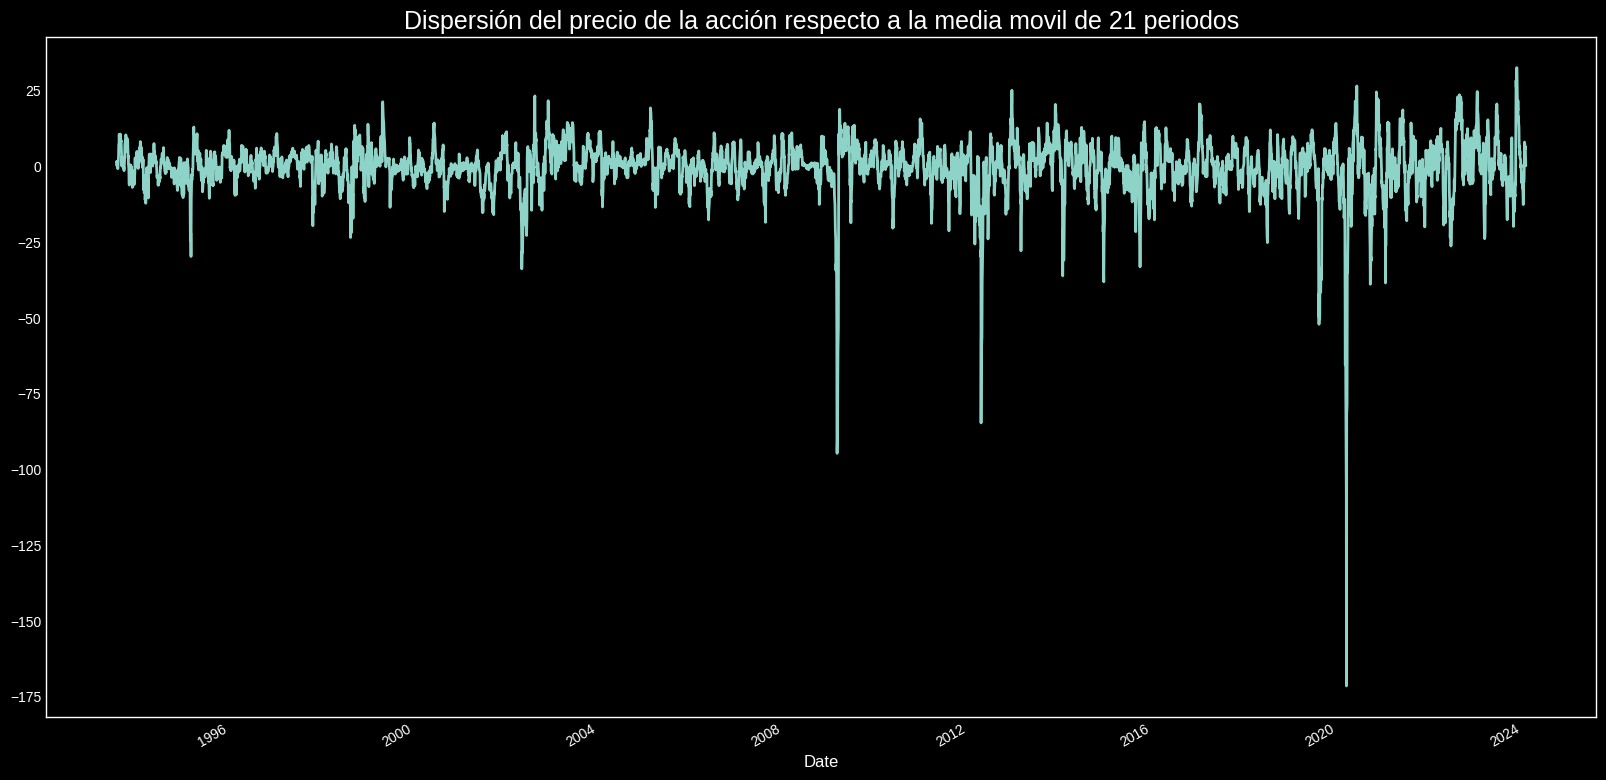

In [37]:
# Graficamos la dispersión respecto a la media movil 21
plt.figure(figsize=(20,10)) 
accion_ypf['disp_21'].plot()
plt.title('Dispersión del precio de la acción respecto a la media movil de 21 periodos', fontsize = 18)  
plt.grid(False)

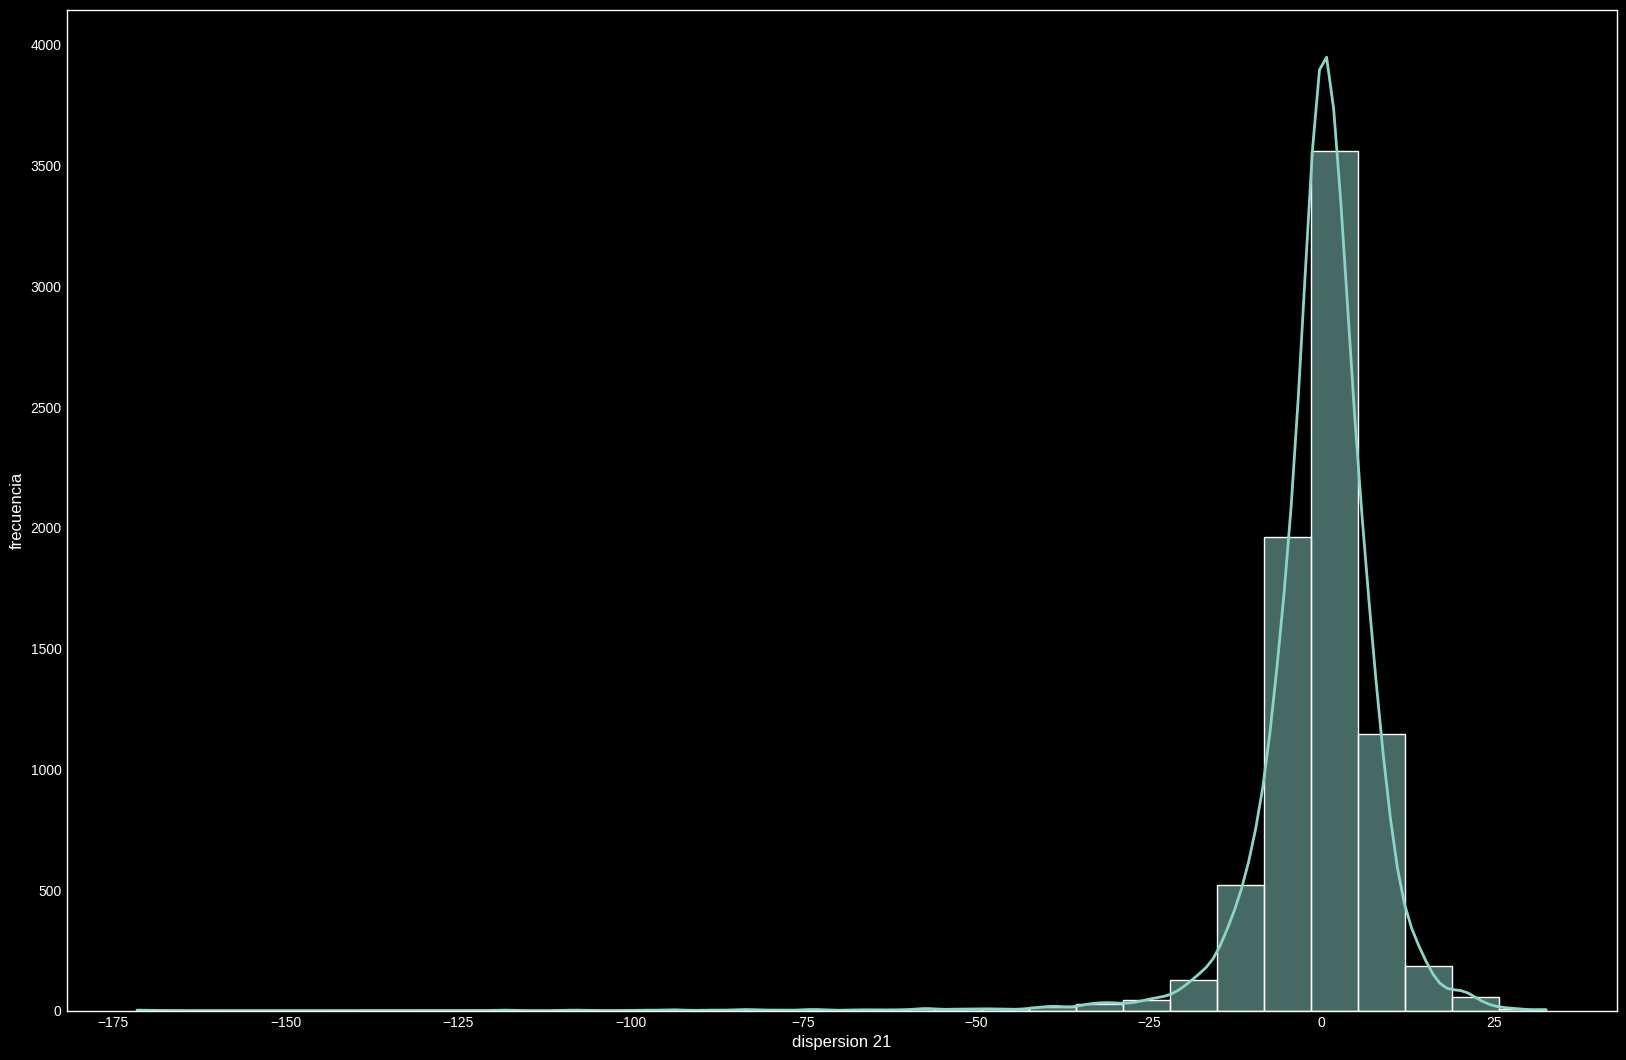

In [38]:
# En función de esto podemos analizar la distribución de este conjunto de datos:
plt.figure(figsize=(20,13))
sns.histplot(accion_ypf['disp_21'],bins=30,kde=True)
plt.xlabel("dispersion 21")
plt.ylabel("frecuencia")
plt.grid(False)

In [39]:
# Cómo vemos parece que en estos conceptos hay una relación la varianza
# Calculemos la media y al varianza de esta acción
media = np.mean(accion_ypf['Close'])
varianza = np.var(accion_ypf['Close'])
print(media)
print(varianza)

16.542319275204807
104.8078831975946


In [40]:
# Ahora vamos a ver como podemos hacer uso de la dispersión respecto de la media para calcular la varianza
varianza_check = np.mean(accion_ypf['disp_media'] ** 2)
print(varianza_check)

104.8078831975946


##### Algunas conclusiones:

En la práctica no se suele calcular la varianza de la acción a secas sino más bien se suele calcular sobre los retornos. Esto es 
así dado que nos permite la comparación entre distintos activos financieros y, además, la serie de retornos presenta mayor estabilidad
al trabajarse en diferencias. Adicionalmente, nos estamos concentrando en la variable aleatoria que queremos analizar que es el 
retorno del activo y cuanto este cambia en el tiempo.

Tener en cuenta que la varianza no es una medida de escala como si lo es el desvío estandar (es la normalización de la varianza). Este si
es una medida que nos dice en que magnitud en promedio se desvían los datos de su media. El término volatilidad se suele utilizar para
medidas de escala como lo es el desvío estandar.